In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sedpods

C:\Users\caio.costa\AppData\Local\Temp\ipykernel_16400\2160211989.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux = sedpods.groupby(['campanha','ponto']).mean().reset_index()


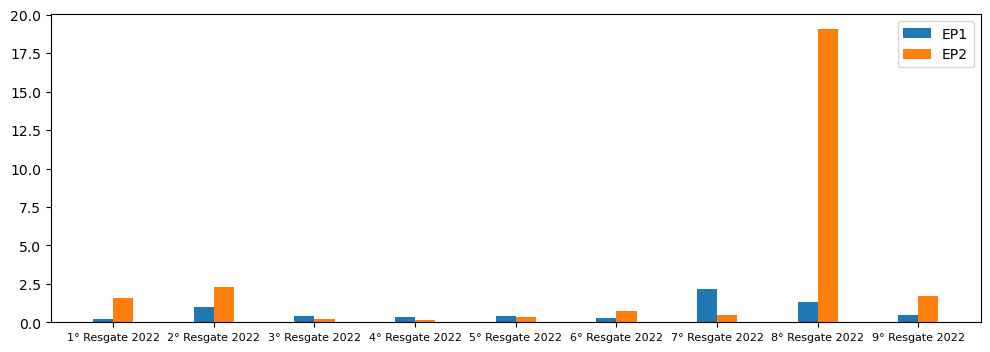

In [4]:
sedpods = pd.read_csv('https://raw.githubusercontent.com/ambilev/poc-pgda/main/sedpods.csv')

aux = sedpods.groupby(['campanha','ponto']).mean().reset_index()

ep1 = aux[aux['ponto'] == 'EP1']
ep2 = aux[aux['ponto'] == 'EP2']

plt.figure(figsize=(12,4))
plt.bar(ep1['campanha'], ep1['massa_seca_final_g'], width=-.2, align='edge')
plt.bar(ep2['campanha'], ep2['massa_seca_final_g'], width=.2, align='edge')
plt.xticks(fontsize=8)
plt.legend(['EP1','EP2'])

plt.show()

## Armadilhas

C:\Users\caio.costa\AppData\Local\Temp\ipykernel_16400\3345508726.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux = armadilhas[armadilhas['presenca_tela'] != 'sim'].groupby(['campanha','ponto']).mean().reset_index()


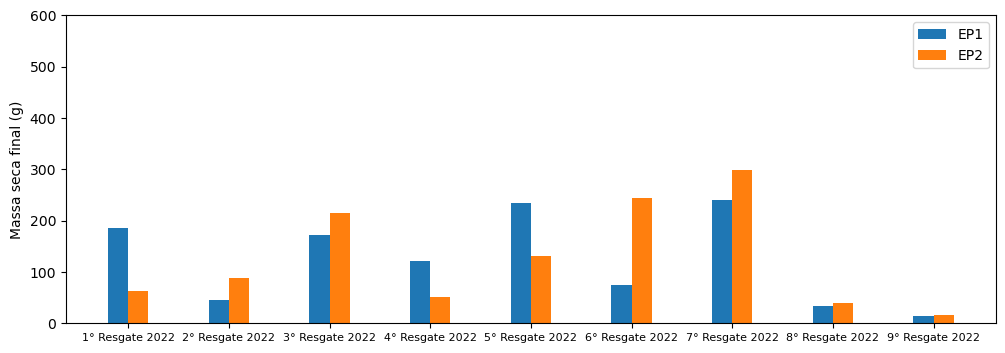

In [5]:
armadilhas = pd.read_csv('https://raw.githubusercontent.com/ambilev/poc-pgda/main/armadilhas.csv')

aux = armadilhas[armadilhas['presenca_tela'] != 'sim'].groupby(['campanha','ponto']).mean().reset_index()

ep1 = aux[aux['ponto'] == 'EP1']
ep2 = aux[aux['ponto'] == 'EP2']

plt.figure(figsize=(12,4))
plt.bar(ep1['campanha'], ep1['massa_seca_final_g'], width=-.2, align='edge')
plt.bar(ep2['campanha'], ep2['massa_seca_final_g'], width=.2, align='edge')
plt.xticks(fontsize=8)
plt.legend(['EP1','EP2'])

plt.ylabel('Massa seca final (g)')
plt.ylim(0,600)
plt.show()

# Granulometria

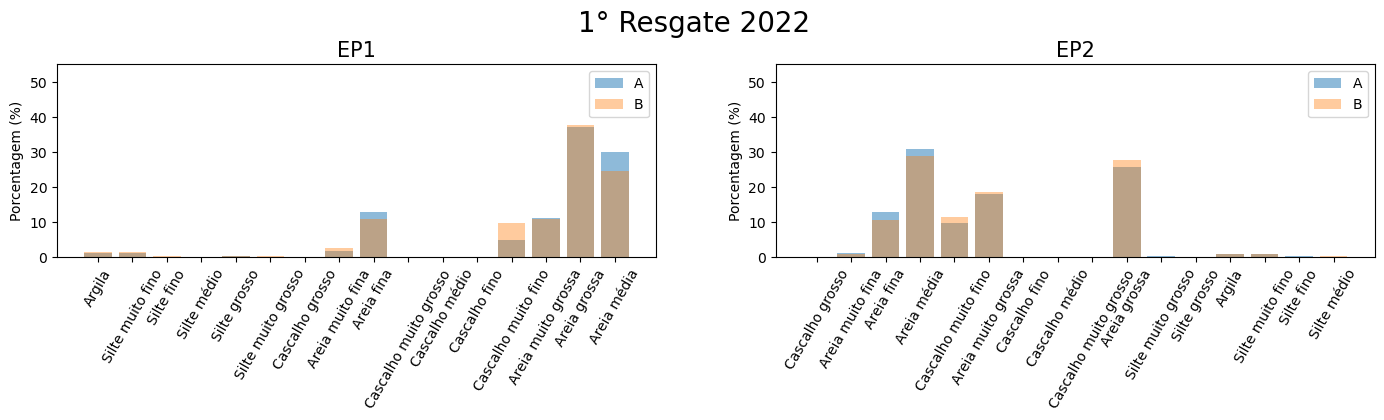

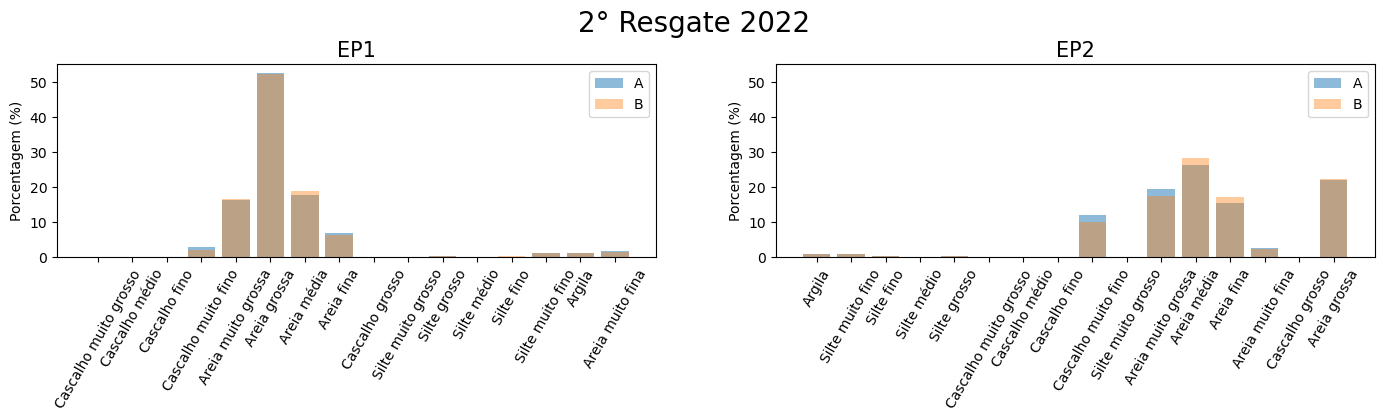

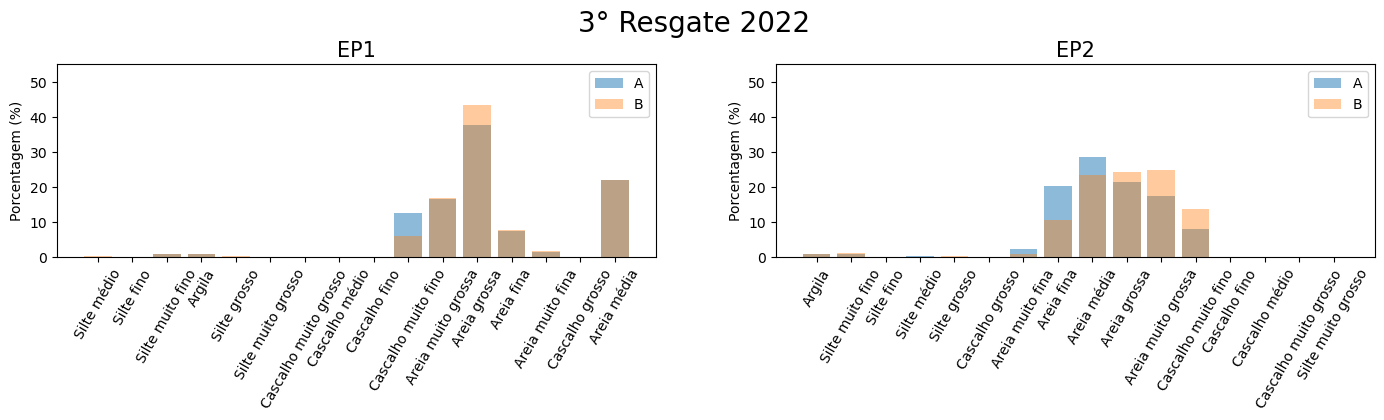

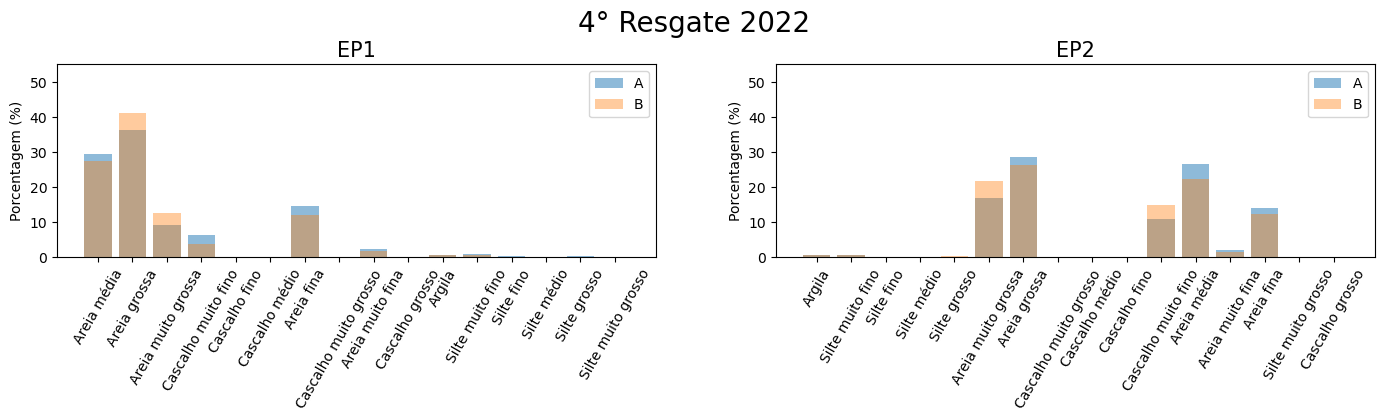

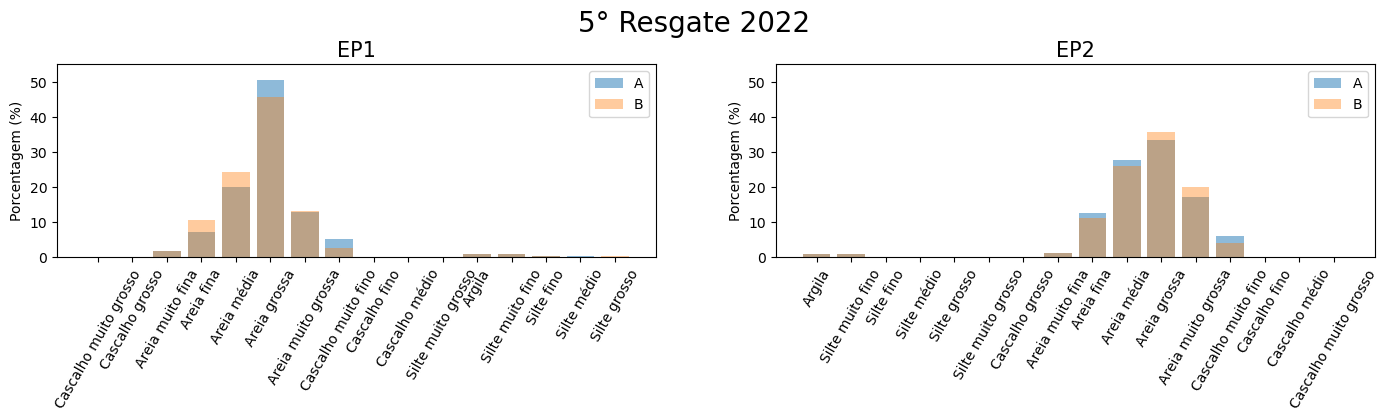

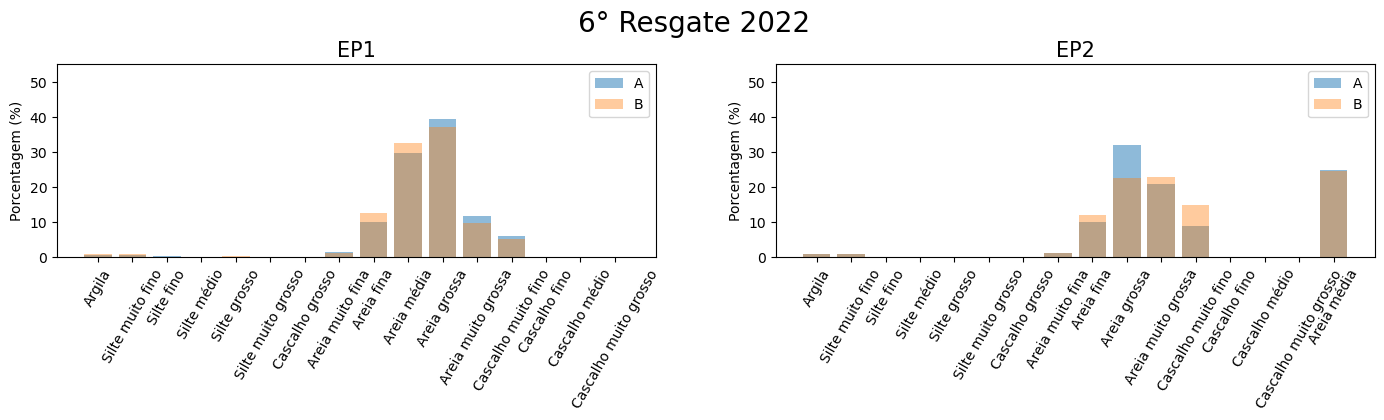

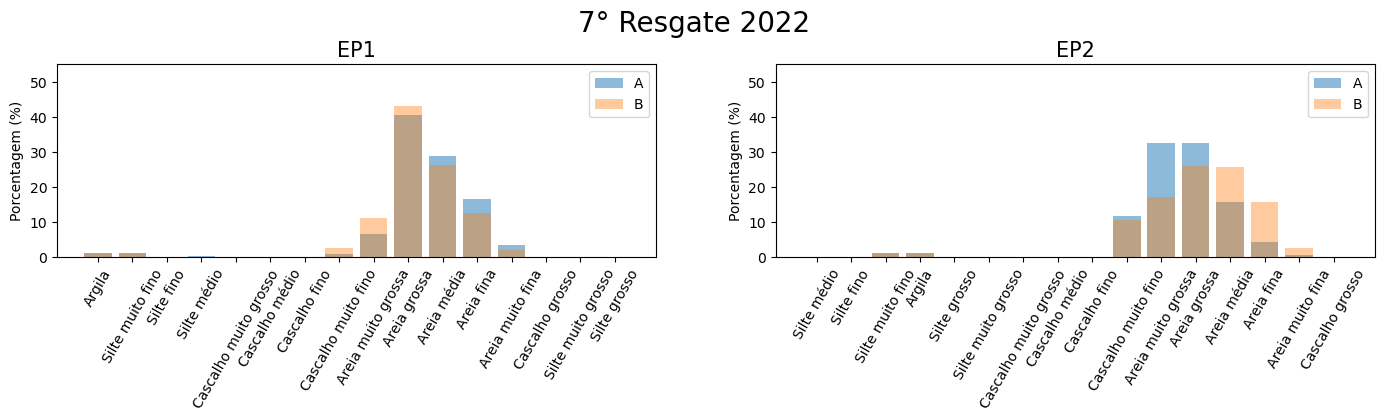

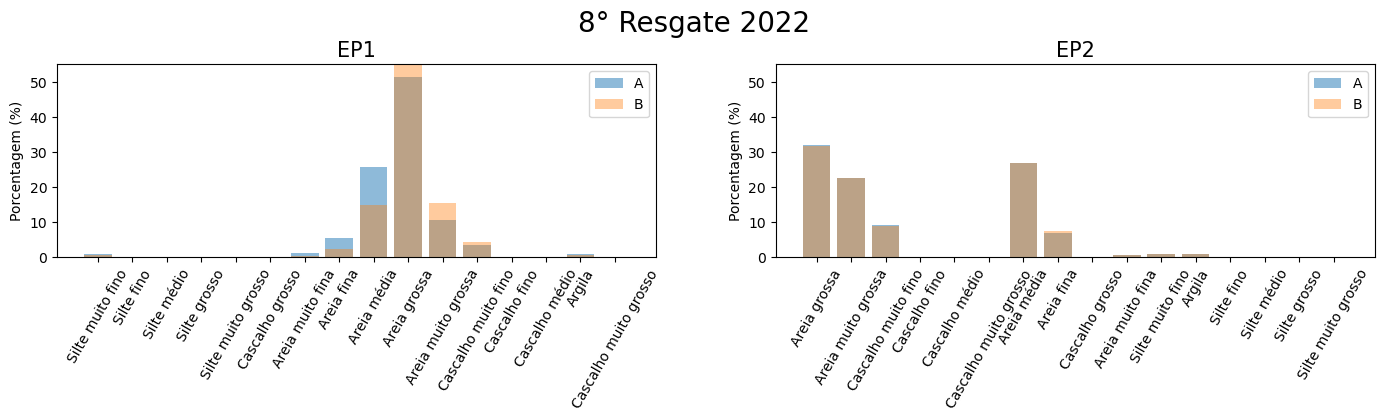

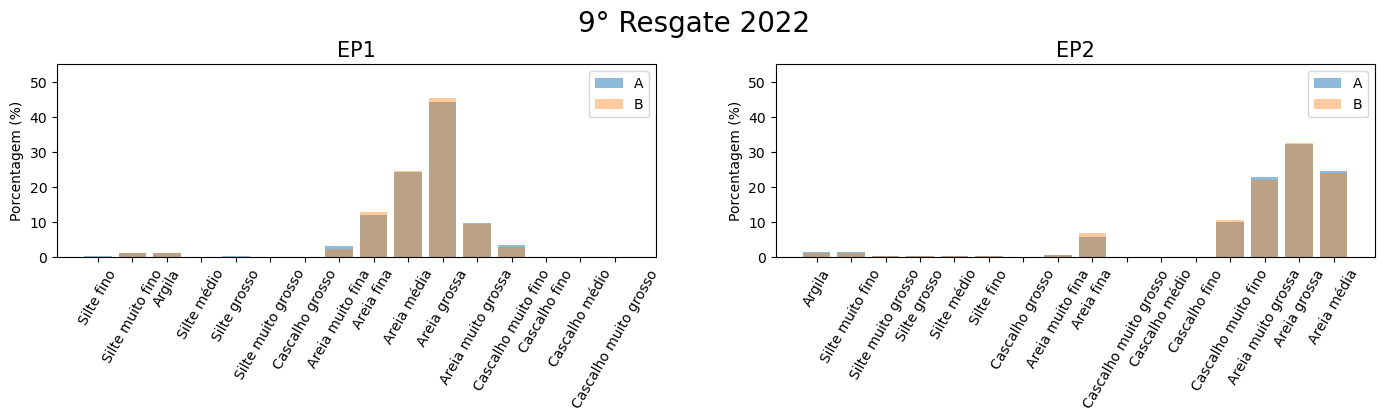

In [74]:
granulometria = pd.read_csv('https://raw.githubusercontent.com/ambilev/poc-pgda/main/granulometria.csv')

for campanha in granulometria['campanha'].unique():
    
    fig, axs = plt.subplots(1,2, figsize=(17,2.5))
    fig.suptitle(campanha, fontsize=20, y=1.1)
    
    i = 0
    for ponto in ['EP1','EP2']:
        ax = axs[i]
        
        histograma = granulometria[(granulometria['campanha'] == campanha) & (granulometria['ponto'] == ponto)]
        
        a = histograma[histograma['identificacao_amostra'].str.contains(' - A')]
        ax.bar(a['analise'], a['resultado_%'], alpha=.5, label='A')
        
        b = histograma[histograma['identificacao_amostra'].str.contains(' - B')]
        ax.bar(b['analise'], b['resultado_%'], zorder=2, alpha=.4, label='B')
        
        ax.set_title('{}'.format(ponto), fontsize=15)
        ax.set_ylim(0,55)
        ax.set_ylabel('Porcentagem (%)')
        ax.set_xticks(a['analise'])
        ax.set_xticklabels(a['analise'], fontsize=10, rotation=60)
        
        ax.legend()
        
        i+=1
    plt.show()
    plt.close()